<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#序列到序列任务中的编码器-解码器架构（Seq2Seq-with-RNN-Encoder-Decoder）" data-toc-modified-id="序列到序列任务中的编码器-解码器架构（Seq2Seq-with-RNN-Encoder-Decoder）-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>序列到序列任务中的编码器-解码器架构（Seq2Seq with RNN Encoder-Decoder）</a></span><ul class="toc-item"><li><span><a href="#RNN-Encoder-Decodr网络架构" data-toc-modified-id="RNN-Encoder-Decodr网络架构-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>RNN Encoder-Decodr网络架构</a></span></li><li><span><a href="#RNN-Encoder-Decodr编码器Encoder原理" data-toc-modified-id="RNN-Encoder-Decodr编码器Encoder原理-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>RNN Encoder-Decodr编码器Encoder原理</a></span></li><li><span><a href="#RNN-Encoder-Decodr解码器Decoder原理" data-toc-modified-id="RNN-Encoder-Decodr解码器Decoder原理-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>RNN Encoder-Decodr解码器Decoder原理</a></span></li><li><span><a href="#RNN-Encdoer-Decoder原理实现" data-toc-modified-id="RNN-Encdoer-Decoder原理实现-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>RNN Encdoer-Decoder原理实现</a></span></li></ul></li><li><span><a href="#序列到序列任务中的注意力机制（Seq2Seq-with-Attention）" data-toc-modified-id="序列到序列任务中的注意力机制（Seq2Seq-with-Attention）-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>序列到序列任务中的注意力机制（Seq2Seq with Attention）</a></span><ul class="toc-item"><li><span><a href="#Seq2Seq-with-Attention网络架构" data-toc-modified-id="Seq2Seq-with-Attention网络架构-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Seq2Seq with Attention网络架构</a></span></li><li><span><a href="#Seq2Seq-with-Attention编码器Encoder原理" data-toc-modified-id="Seq2Seq-with-Attention编码器Encoder原理-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Seq2Seq with Attention编码器Encoder原理</a></span></li><li><span><a href="#Seq2Seq-with-Attention解码器Decoder原理" data-toc-modified-id="Seq2Seq-with-Attention解码器Decoder原理-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Seq2Seq with Attention解码器Decoder原理</a></span></li><li><span><a href="#Seq2Seq-with-Attention原理实现" data-toc-modified-id="Seq2Seq-with-Attention原理实现-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Seq2Seq with Attention原理实现</a></span></li></ul></li><li><span><a href="#注意力机制Attention" data-toc-modified-id="注意力机制Attention-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>注意力机制Attention</a></span><ul class="toc-item"><li><span><a href="#柔性注意力机制（Soft-Attention）" data-toc-modified-id="柔性注意力机制（Soft-Attention）-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>柔性注意力机制（Soft Attention）</a></span><ul class="toc-item"><li><span><a href="#注意力分布" data-toc-modified-id="注意力分布-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>注意力分布</a></span></li><li><span><a href="#加权平均" data-toc-modified-id="加权平均-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>加权平均</a></span></li></ul></li><li><span><a href="#键值对注意力机制（Key-Value-Pair-Attention-Mechanism）" data-toc-modified-id="键值对注意力机制（Key-Value-Pair-Attention-Mechanism）-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>键值对注意力机制（Key-Value Pair Attention Mechanism）</a></span></li><li><span><a href="#多头注意力机制（Multi-Head-Attention-Mechanism）" data-toc-modified-id="多头注意力机制（Multi-Head-Attention-Mechanism）-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>多头注意力机制（Multi-Head Attention Mechanism）</a></span></li><li><span><a href="#自注意力模型（Self-Attention-Model）" data-toc-modified-id="自注意力模型（Self-Attention-Model）-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>自注意力模型（Self-Attention Model）</a></span></li></ul></li></ul></div>

# 序列到序列任务中的注意力机制（Seq2Seq with Attention）

## 序列到序列任务中的编码器-解码器架构（Seq2Seq with RNN Encoder-Decoder）

### RNN Encoder-Decodr网络架构

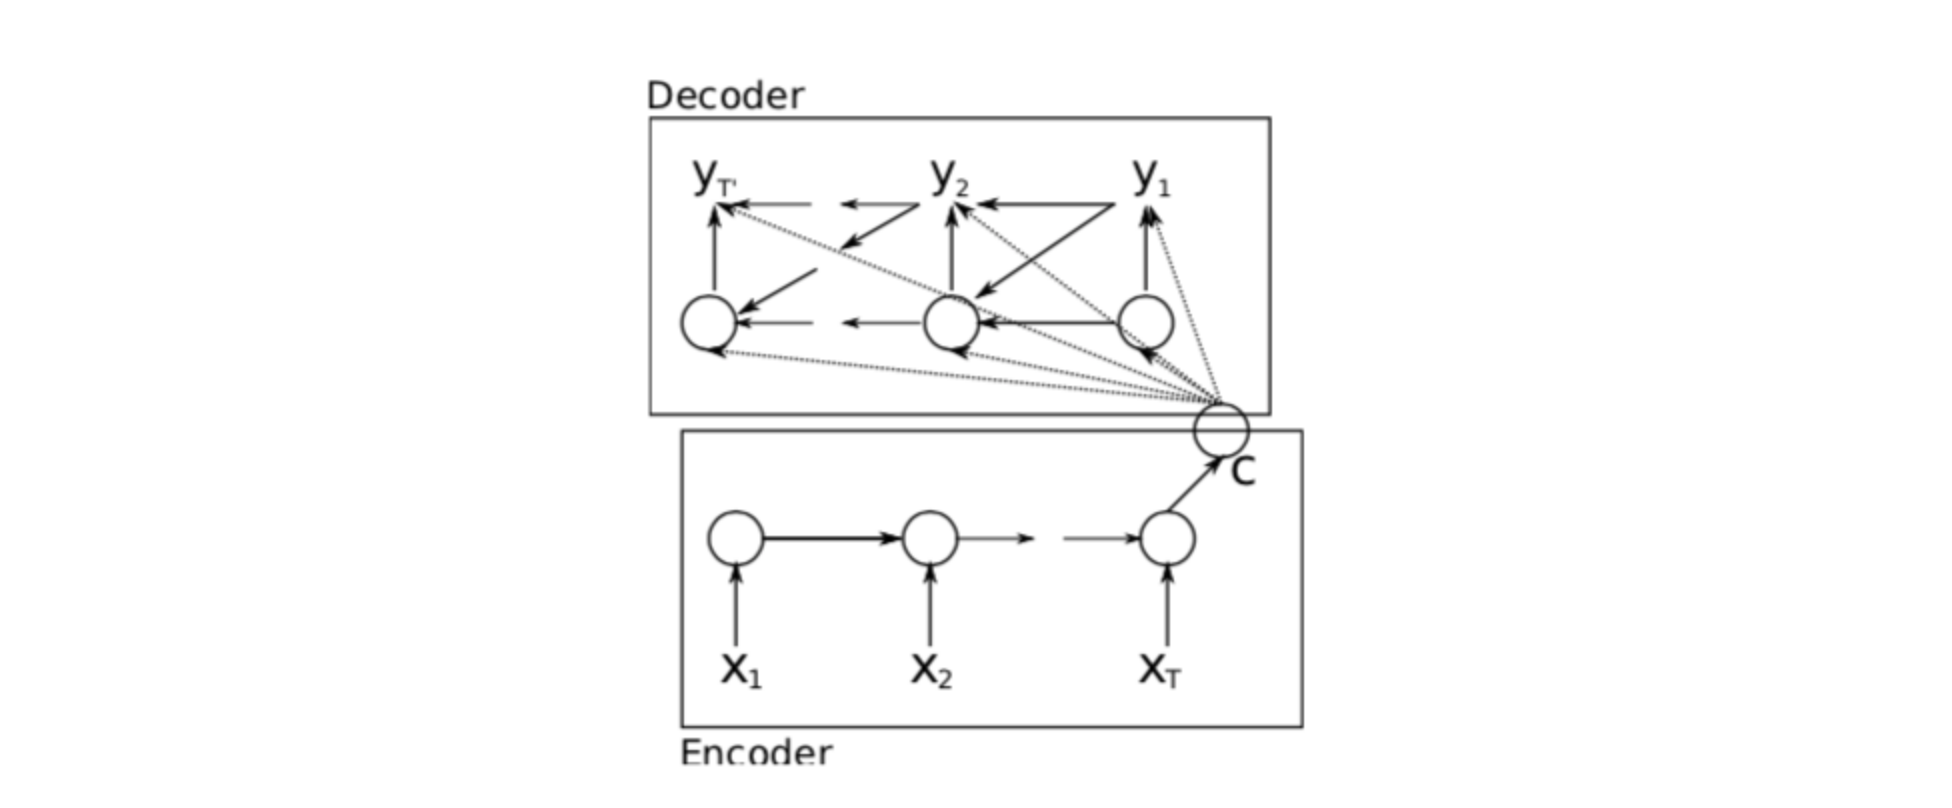

RNN Encoder-Decoder神经网络架构使用循环神经网络学习，将变长源序列$X$编码成定长向量表示$\mathbf{c}$，并将学习的定长向量表示$\mathbf{c}$解码成变长目标序列$Y$。模型的编码器和解码器被联合训练，以最大化给定源序列的目标序列的条件概率。

源文本序列：$X=\left(\mathbf{x}_{1}, \mathbf{x}_{2}, \dots, \mathbf{x}_{N}\right)$
其中，$\mathbf{x}_i=\left(l_1,l_2,\cdots,l_j,\cdots,l_K\right)$，其中$l_j=I\left(i=j\right),\quad\left(j=1,\cdots,K\right)$。

目标文本序列：$Y=\left(\mathbf{y}_{1}, \mathbf{y}_{2}, \dots, \mathbf{y}_{M}\right)$
其中，$\mathbf{y}_i=\left(l_1,l_2,\cdots,l_j,\cdots,l_K\right)$，其中$l_j=\left(i=j\right),\quad\left(j=1,\cdots,K\right)$

### RNN Encoder-Decodr编码器Encoder原理

源文本单词的词嵌入表示：$e\left(\mathbf{x}_i\right)\in\mathbb{R}^{500}$

编码器的隐藏状态由1000个隐藏单元组成。  
编码器隐藏状态初始化，在$t=0$时刻第$j$个隐藏单元
$$h_j^{\langle0\rangle}=0$$

在$t$时刻第$j$个隐藏单元$$h_{j}^{\langle t\rangle}=z_{j} h_{j}^{\langle t-1\rangle}+\left(1-z_{j}\right) \tilde{h}_{j}^{\langle t\rangle}$$
其中，$$\begin{align}
\tilde{h}_{j}^{\langle t \rangle}&=\tanh \left(\left[\mathbf{W} e\left(\mathbf{x}_{t}\right)\right]_{j}+\left[\mathbf{U}\left(\mathbf{r} \odot \mathbf{h}^{\langle t-1\rangle}\right)\right]_{j}\right)\\
z_{j}&=\sigma\left(\left[\mathbf{W}_{z} e\left(\mathbf{x}_{t}\right)\right]_{j}+\left[\mathbf{U}_{z} \mathbf{h}^{\langle t-1\rangle}\right]_{j}\right) \\
r_{j}&=\sigma\left(\left[\mathbf{W}_{r} e\left(\mathbf{x}_{t}\right)\right]_{j}+\left[\mathbf{U}_{r} \mathbf{h}^{\langle t-1\rangle}\right]_{j}\right)
\end{align} 
$$

$\sigma\left(\cdot\right)$为sigmoid函数，$\odot$为向量元素乘法，$\mathbf{W},\mathbf{W}_z,\mathbf{W}_r\in\mathbb{R}^{1000\times 500}$和$\mathbf{U},\mathbf{U}_z,\mathbf{U}_r\in\mathbb{R}^{1000\times 1000}$为权值矩阵。为了使方程齐整，省略了偏置项。

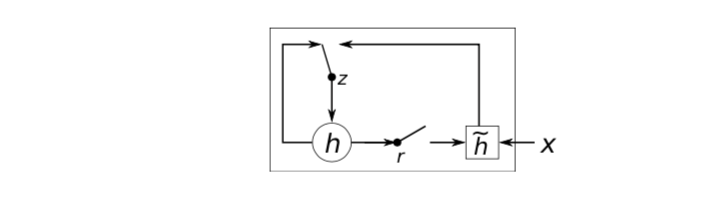

源文本最后第$N$时刻，编码器的隐藏状态计算完成，源文本的定长向量表示$$\mathbf{c}=\tanh \left(\mathbf{V h}^{\langle N\rangle}\right)$$
其中，$\mathbf{V}\in\mathbb{R}^{1000\times 1000}$为权值矩阵。

### RNN Encoder-Decodr解码器Decoder原理

解码器隐藏状态初始化，在$t=0$时刻
$$\mathbf{h}^{\prime\langle 0\rangle}=\tanh \left(\mathbf{V}^{\prime} \mathbf{c}\right)$$
其中，$\mathbf{V}\in\mathbb{R}^{1000\times 1000}$为权值矩阵。

在$t$时刻第$j$个隐藏单元
$$h_{j}^{\prime\langle t\rangle}=z_{j}^{\prime} h_{j}^{\prime\langle t-1\rangle}+\left(1-z_{j}^{\prime}\right) \tilde{h^{\prime}}_{j}^{\langle t \rangle} )$$
其中，
$$\begin{align}
\tilde{h^{\prime}}_{j}^{\langle t\rangle}&=\tanh \left(\left[\mathbf{W}^{\prime} e\left(\mathbf{y}_{t-1}\right)\right]_{j}+r_{j}^{\prime}\left[\mathbf{U}^{\prime} \mathbf{h}_{\langle t-1\rangle}^{\prime}+\mathbf{C} \mathbf{c}\right]\right)  \\
z_{j}^{\prime}&=\sigma\left(\left[\mathbf{W}_{z}^{\prime} e\left(\mathbf{y}_{t-1}\right)\right]_{j}+\left[\mathbf{U}_{z}^{\prime} \mathbf{h}^{\prime}_{\langle t-1\rangle}\right]_{j}+\left[\mathbf{C}_{z} \mathbf{c}\right]_{j}\right)  \\
r_{j}^{\prime}&=\sigma\left(\left[\mathbf{W}_{r}^{\prime} e\left(\mathbf{y}_{t-1}\right)\right]_{j}+\left[\mathbf{U}_{r}^{\prime} \mathbf{h}^{\prime}_{\langle t-1\rangle}\right]_{j}+\left[\mathbf{C}_{r} \mathbf{c}\right]_{j}\right)
\end{align}$$
其中，$\mathbf{W}^{\prime},\mathbf{W}_z^{\prime},\mathbf{W}_r^{\prime}\in\mathbb{R}^{1000\times 500}$和$\mathbf{U}^{\prime},\mathbf{U}_z^{\prime},\mathbf{U}_r^{\prime}\in\mathbb{R}^{1000\times 1000}$以及$\mathbf{C}^{\prime},\mathbf{C}_z^{\prime},\mathbf{C}_r^{\prime}\in\mathbb{R}^{1000\times 1000}$为权值矩阵。

目标文本单词的词嵌入表示：$e\left(\mathbf{y}_i\right)\in\mathbb{R}^{500}$，且在$t=0$时刻$e\left(\mathbf{y}_0\right)=\mathbf{0}$。

在每个时刻$t$，解码器计算生成第$j$个单词的概率
$$p\left(y_{t, j}=1 | \mathbf{y}_{t-1}, \ldots, \mathbf{y}_{1}, X\right)=\frac{\exp \left(\mathbf{g}_{j} \mathbf{s}_{\langle t\rangle}\right)}{\sum_{j^{\prime}=1}^{K} \exp \left(\mathbf{g}_{j^{\prime}} \mathbf{s}_{\langle t\rangle}\right)}$$
其中，最大输出单元（maxout unit）
$$s_{i}^{\langle t\rangle}=\max \left\{s_{2 i-1}^{\prime \langle t\rangle}, s_{2 i}^{\prime\langle t\rangle}\right\}$$
且
$$\mathbf{s}^{\prime\langle t\rangle}=\mathbf{O}_{h} \mathbf{h}^{\prime\langle t\rangle}+\mathbf{O}_{y} \mathbf{y}_{t-1}+\mathbf{O}_{c} \mathbf{c}$$
$\mathbf{O}_h,\mathbf{O}_c\in\mathbb{R}^{500\times 1000}$和$\mathbf{O}_y\in\mathbb{R}^{500\times 500}$以及$\mathbf{G}=\left[\mathbf{g}_1,\cdots,\mathbf{g}_K\right]\in\mathbb{R}^{K\times 1000}$为权值矩阵。

### RNN Encdoer-Decoder原理实现

In [1]:
import numpy as np
import tensorflow as tf

tf.__version__

'1.12.0'

In [18]:
tf.reset_default_graph()

char_arr = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz']
num_dic = {n: i for i, n in enumerate(char_arr)}

seq_data = [['man', 'women'], ['black', 'white'], ['king', 'queen'], [
    'girl', 'boy'], ['up', 'down'], ['high', 'low']]

n_step = 5
n_hidden = 128
n_class = len(num_dic)


def make_batch(seq_data):
    input_batch, output_batch, target_batch = [], [], []

    for seq in seq_data:
        for i in range(2):
            seq[i] = seq[i] + 'P' * (n_step - len(seq[i]))

        input = [num_dic[n] for n in seq[0]]
        output = [num_dic[n] for n in ('S' + seq[1])]
        target = [num_dic[n] for n in (seq[1] + 'E')]

        input_batch.append(np.eye(n_class)[input])
        output_batch.append(np.eye(n_class)[output])

        target_batch.append(target)

    return input_batch, output_batch, target_batch


enc_input = tf.placeholder(tf.float32, [None, None, n_class])
dec_input = tf.placeholder(tf.float32, [None, None, n_class])
targets = tf.placeholder(tf.int64, [None, None])

with tf.variable_scope('encoder'):
    enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5)
    _, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input, dtype=tf.float32)

with tf.variable_scope('decoder'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)
    outputs, _ = tf.nn.dynamic_rnn(
        dec_cell, dec_input, initial_state=enc_states, dtype=tf.float32)

model = tf.layers.dense(outputs, n_class, activation=None)

cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits=model, labels=targets))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
input_batch, output_batch, target_batch = make_batch(seq_data)

for epoch in range(5000):
    _, loss = sess.run([optimizer, cost], feed_dict={
                       enc_input: input_batch, dec_input: output_batch, targets: target_batch})
    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.6f}'.format(loss))


def translate(word):
    seq_data = [word, 'P' * len(word)]

    input_batch, output_batch, _ = make_batch([seq_data])
    prediction = tf.argmax(model, 2)

    result = sess.run(prediction, feed_dict={
                      enc_input: input_batch, dec_input: output_batch})

    decoded = [char_arr[i] for i in result[0]]
    end = decoded.index('E')
    translated = ''.join(decoded[:end])

    return translated.replace('P', '')


print('test')
print('man ->', translate('man'))
print('mans ->', translate('mans'))
print('king ->', translate('king'))
print('black ->', translate('black'))
print('up ->', translate('up'))

Epoch: 1000 cost =  0.000840
Epoch: 2000 cost =  0.000314
Epoch: 3000 cost =  0.000181
Epoch: 4000 cost =  0.000044
Epoch: 5000 cost =  0.000027
test
man -> women
mans -> women
king -> queen
black -> white
up -> down


## 序列到序列任务中的注意力机制（Seq2Seq with Attention）

### Seq2Seq with Attention网络架构

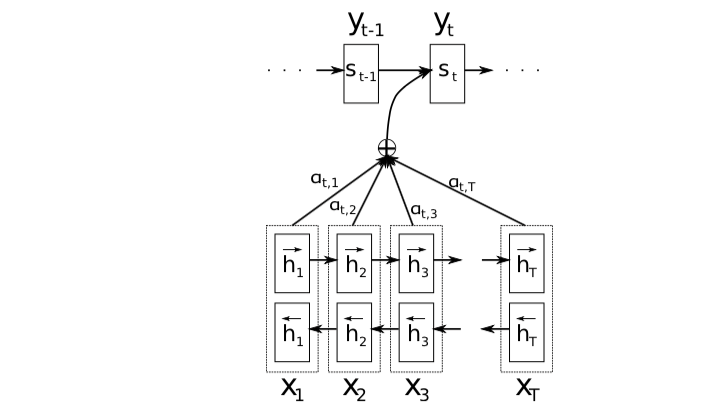

seq2seq with Attention神经网络架构中，编码器采用双向循环神经网络学习将输入序列$\mathbf{x}$编码成每个时刻的上下文向量（注意力分布）$c_i$，解码器学习将上下文向量$c_i$解码为输出序列$\mathbf{y}$。

源文本序列：$\mathbf{x}=\left(x_1,\cdots,x_{T_x}\right)$，其中$x_i\in\mathbb{R}^{K_x}$为one-of-K编码 ，$K_x$为源语言词表长度，$T_x$为源语料长度。   
目标文本序列：$\mathbf{y}=\left(y_1,\cdots,y_{T_y}\right)$，其中$y_i\in\mathbb{R}^{K_y}$为one-of-K编码，$K_y$为目标语言词表长度，$T_y$为目标语料长度。

### Seq2Seq with Attention编码器Encoder原理

编码器Encoder采用双向循环神经网络，前向状态计算
$$\overrightarrow{h}_i=\left\{
\begin{aligned}
& \left(1-\overrightarrow{z}_i\right)\circ\overrightarrow{h}_{i-1}+\overrightarrow{z}_i\circ\overrightarrow{\underline{h}}_i& ,\mathbf{i}\mathbf{f}\ i>0\\
& 0 &, \mathbf{i}\mathbf{f}\ i=0
\end{aligned}
\right.$$
其中，
$$\overrightarrow{\underline{h}}_i=\tanh\left(\overrightarrow{W}\overline{E}x_i+\overrightarrow{U}\left[\overrightarrow{r}_i\circ\overrightarrow{h}_{i-1}\right]\right)  \\
\overrightarrow{z}_i=\sigma\left(\overrightarrow{W}_z\overline{E}x_i+\overrightarrow{U}_z\overrightarrow{h}_{i-1}\right) \\
\overrightarrow{r}_i=\sigma\left(\overrightarrow{W}_r\overline{E}x_i+\overrightarrow{U}_r\overrightarrow{h}_{i-1}\right)$$
$\overline{E}\in\mathbb{R}^{m\times K_x}$为词嵌入矩阵，$m$为词嵌入维度。$\overrightarrow{W},\overrightarrow{W}_z,\overrightarrow{W}_r\in\mathbb{R}^{n\times m}$和$\overrightarrow{U},\overrightarrow{U}_z,\overrightarrow{U}_r\in\mathbb{R}^{n\times n}$为权值矩阵，$n$为隐藏单元数。$\sigma\left(\cdot\right)$通常为sigmoid函数。

后向状态$\left(\overleftarrow{h}_1,\cdots,\overleftarrow{h}_{T_x}\right)$计算相同。与权值矩阵不同，我们在前向和后向RNN网络中共享词嵌入矩阵$\overline{E}$。

将前向和后向状态关联起来得到注释$\left(h_1,h_2,\cdots,h_{T_x}\right)$，  
其中，$$h_i=\begin{bmatrix}
\overrightarrow{h}_i\\
\overleftarrow{h}_i
\end{bmatrix}$$

### Seq2Seq with Attention解码器Decoder原理

解码器Decoder隐层转态$s_i$由解码器注释$h_i$计算的注意力分布$c_i$得到
$$s_i=\left(1-z_i\right)\circ s_{i-1}+z_i\circ\tilde{s}_i$$
其中，
$$\tilde{s}_i=\tanh\left(WEy_{i-1}+U\left[r_i\circ s_{i-1}\right]+Cc_i\right) \\
z_i=\sigma\left(W_zEy_{i-1}+U_zs_{i-1}+C_rc_i\right) \\
r_i=\sigma\left(W_rEy_{i-1}+U_rs_{i-1}+C_rc_i\right)$$
$E\in\mathbb{R}^{m\times K_y}$为目标语言的词嵌入矩阵，$m$为词嵌入维度。$W,W_z,W_r\in\mathbb{R}^{n\times m}$和$U,U_z,U_r\in\mathbb{R}^{n\times n}$以及
$C,C_z,C_r\in\mathbb{R}^{n\times 2n}$为权值矩阵，$n$为隐藏单元数。隐层初始状态$s_0=\tanh\left(W_s\overleftarrow{h}_1\right)$，其中$W_s\in\mathbb{R}^{n\times n}$。

每个时刻的上下文向量（注意力分布）$c_i$的计算
$$c_i=\sum_{j=1}^{T_x}a_{ij}h_j$$
其中，
$$a_{ij}=\frac{\exp\left(e_{ij}\right)}{\sum_{k=1}^{T_x}\exp\left(e_{ik}\right)}    \\ 
e_{ij}=v_a^\top\tanh\left(W_as_{i-1}+U_ah_j\right)$$
$h_j$为源文本序列第$j$个注释。$v_a\in\mathbb{R}^{n^{'}},W_a\in\mathbb{R}^{n^{'}\times n},U_a\in\mathbb{R}^{n^{'}\times 2n}$为权值矩阵。

使用解码器状态$s_{i-1}$，上下文$c_i$和上时刻生成单词$y_{i-1}$定义目标单词$y_i$的概率
$$p\left(y_i|s_i,y_{i-1},c_i\right)\propto\exp\left(y_i^\top W_o t_i\right)$$
其中，
$$t_i=\left[\max\left\{\tilde{t}_{i,2j-1},\tilde{t}_{i,wj}\right\}\right]_{j=1,\cdots,l}^\top$$
$\tilde{t}_{i,k}$是向量$\tilde{t}_i$的第$k$个元素，
$$\tilde{t}_i=U_os_{i-1}+V_oEy_{i-1}+C_oc_i$$
$W_o\in\mathbb{R}^{K_y\times l},U_o\in\mathbb{R}^{2l\times n},C_o\in\mathbb{R}^{2l\times 2n}$是权值矩阵。

### Seq2Seq with Attention原理实现

In [4]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
tf.reset_default_graph()

In [6]:
sentences = ['ich mochte ein bier P', 'S i want a beer', 'i want a beer E']

word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}
number_dict = {i: w for i, w in enumerate(word_list)}
n_class = len(word_dict)

In [7]:
n_step = 5
n_hidden = 128

In [8]:
def make_batch(sentences):
    input_batch = [np.eye(n_class)[[word_dict[n] for n in sentences[0].split()]]]
    output_batch = [np.eye(n_class)[[word_dict[n] for n in sentences[1].split()]]]
    target_batch = [[word_dict[n] for n in sentences[2].split()]]
    
    return input_batch, output_batch, target_batch

In [9]:
enc_inputs = tf.placeholder(tf.float32, [None, None, n_class])
dec_inputs = tf.placeholder(tf.float32, [None, None, n_class])
targets = tf.placeholder(tf.int64, [1, n_step])

In [10]:
attn = tf.Variable(tf.random_normal([n_hidden, n_hidden]))
out = tf.Variable(tf.random_normal([n_hidden * 2, n_class]))

In [11]:
def get_att_score(dec_output, enc_output):
    score = tf.squeeze(tf.matmul(enc_output, attn), 0)
    dec_output = tf.squeeze(dec_output, [0, 1])
    
    return tf.tensordot(dec_output, score, 1)

def get_att_weight(dec_output, enc_outputs):
    attn_scores = []
    enc_outputs = tf.transpose(enc_outputs, [1, 0, 2])
    for i in range(n_step):
        attn_scores.append(get_att_score(dec_output, enc_outputs[i]))
        
    return tf.reshape(tf.nn.softmax(attn_scores), [1, 1, -1])

In [12]:
model = []
# Attention = []

In [13]:
with tf.variable_scope('encode'):
    enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5)
    enc_outputs, enc_hidden = tf.nn.dynamic_rnn(enc_cell, enc_inputs, dtype=tf.float32)

In [14]:
with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)

    inputs = tf.transpose(dec_inputs, [1, 0, 2])
    hidden = enc_hidden
    for i in range(n_step):
        dec_output, hidden = tf.nn.dynamic_rnn(dec_cell,
                                               tf.expand_dims(inputs[i], 1),
                                               initial_state=hidden,
                                               dtype=tf.float32,
                                               time_major=True)
        attn_weights = get_att_weight(dec_output, enc_outputs)  
        # Attention.append(tf.squeeze(attn_weights))

        context = tf.matmul(attn_weights, enc_outputs)
        dec_output = tf.squeeze(dec_output, 0)  
        context = tf.squeeze(context, 1)  

        model.append(tf.matmul(tf.concat((dec_output, context), 1), out))

In [15]:
# trained_attn = tf.stack([Attention[0], Attention[1], Attention[2], Attention[3], Attention[4]], 0)  
model = tf.transpose(model, [1, 0, 2])  
prediction = tf.argmax(model, 2)
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model, labels=targets))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [16]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(2000):
        input_batch, output_batch, target_batch = make_batch(sentences)
        _, loss, attention = sess.run([optimizer, cost, trained_attn],
                                      feed_dict={enc_inputs: input_batch,
                                                 dec_inputs: output_batch,
                                                 targets: target_batch})
        if (epoch + 1) % 400 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost=', '{:.6f}'.format(loss))
            
    predict_batch = [np.eye(n_class)[[word_dict[n] for n in 'P P P P P'.split()]]]
    result = sess.run(prediction, feed_dict={enc_inputs: input_batch,
                                             dec_inputs: predict_batch})
    print(sentences[0].split(), '->', [number_dict[n] for n in result[0]])

Epoch: 0400 cost= 0.000000
Epoch: 0800 cost= 0.000008
Epoch: 1200 cost= 0.000002
Epoch: 1600 cost= 0.002508
Epoch: 2000 cost= 0.000000
['ich', 'mochte', 'ein', 'bier', 'P'] -> ['i', 'want', 'a', 'beer', 'E']


## 注意力机制Attention

### 柔性注意力机制（Soft Attention）

输入信息$X=\left[\mathbf{x}_1,\cdots,\mathbf{x}_N\right]$

注意力机制的计算：
1. 在输入信息上计计算注意力分布；
2. 根据注意力分布计算输入信息的加权平均。

#### 注意力分布

给定一个和任务相关的查询向量$\mathbf{q}$，用注意力变量$z\in\left[1,N\right]$表示被选择信息的索引位置，即$z=i$表示选择了第$i$个输入信息。其中，查询向量$\mathbf{q}$可以是动态生成的，也可以是可学习的参数。

软性注意力的注意力分布  
在给定输入信息$X$和查询变量$\mathbf{q}$下，选择第$i$个输入信息的概率
$$\begin{align}
\alpha_i&=p\left(z=i|X,\mathbf{q}\right) \\
&=softmax\left(s\left(\mathbf{x}_i,\mathbf{q}\right)\right) \\
&=\frac{\exp\left(s\left(\mathbf{x}_i,\mathbf{q}\right)\right)}{\sum_{j=1}^N\exp\left(s\left(\mathbf{x}_j,\mathbf{q}\right)\right)}
\end{align}$$
其中，$\alpha_i$称为注意力分布，$s\left(\mathbf{x}_i,\mathbf{q}\right)$称为注意力打分函数。

注意力打分函数
* 加性模型  $s\left(\mathbf{x}_i,\mathbf{q}\right)=\mathbf{v}^\top\tanh\left(W\mathbf{x}_i+U\mathbf{q}\right)$
* 点积模型  $s\left(\mathbf{x}_i,\mathbf{q}\right)=\mathbf{x}_i^\top\mathbf{q}$
* 缩放点积模型 $s\left(\mathbf{x}_i,\mathbf{q}\right)=\frac{\mathbf{x}_i^\top\mathbf{q}}{\sqrt{d}}$
* 双线性模型 $s\left(\mathbf{x}_i,\mathbf{q}\right)=\mathbf{x}_i^\top W\mathbf{q}$  

其中，$W,U,\mathbf{v}$为可学习的网络参数，$d$为输入信息的维度。  
加性模型和点积模型的复杂度近似，但点积模型可利用矩阵乘积，计算效率跟高。当输入信息的维度$d$比较高，点积模型值方差较大，导致softmax函数的梯度较小，缩放点积模型可以解决。双线性模型是泛化的点积模型。若假设$W=U^\top V$，则$s\left(\mathbf{x}_i,\mathbf{q}\right)=\mathbf{x}_i^\top U^\top V\mathbf{q}=\left(U\mathbf{x}_i\right)^\top\left(V\mathbf{q}\right)$，即分别对$\mathbf{x}_i$和$\mathbf{q}$进行线性变换后进行点积。相比点积模型，双线性模型在计算相似度是引入了非对称性。

注意力分布$\alpha_i$可解释为在给定相关查询$\mathbf{q}$时，第$i$个信息受关注的程度。

#### 加权平均

注意力函数
$$\begin{align}
att\left(X,\mathbf{q}\right)&=\sum_{i=1}^N\alpha_i\mathbf{x}_i  \\
&=\mathbb{E}_{z\thicksim p\left(z|X,\mathbf{q}\right)}\left[\mathbf{x}\right]
\end{align}$$

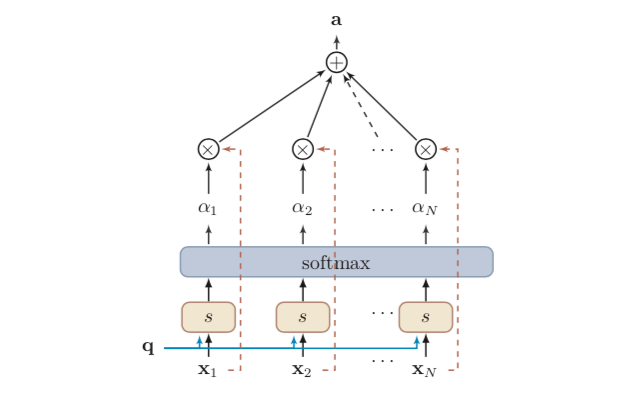

### 键值对注意力机制（Key-Value Pair Attention Mechanism） 

输入信息$\left(K,V\right)=\left[\left(\mathbf{k}_1,\mathbf{v}_1\right),\cdots,\left(\mathbf{k}_N,\mathbf{v}_N\right)\right]$，其中键用来计算注意力分布$\alpha_i$，值用来计算聚合信息。

给定任务相关查询向量$\mathbf{q}$时，注意力分布
$$\alpha_i=\frac{\exp\left(s\left(\mathbf{k}_i,\mathbf{q}\right)\right)}{\sum_{j=1}^N\exp\left(s\left(\mathbf{k}_j,\mathbf{q}\right)\right)}$$

注意力函数
$$\begin{align}
att\left(\left(K,V\right),\mathbf{q}\right)&=\sum_{i=1}^N\alpha_i\mathbf{v}_i \\
&=\sum_{i=1}^N\frac{\exp\left(s\left(\mathbf{k}_i,\mathbf{q}\right)\right)}{\sum_{j=1}^N\exp\left(s\left(\mathbf{k}_j,\mathbf{q}\right)\right)}\mathbf{v}_i
\end{align}$$
其中，$s\left(\mathbf{k}_i,\mathbf{q}\right)$为打分函数。当$K=V$时，键值对注意力机制等价为柔性注意力机制。

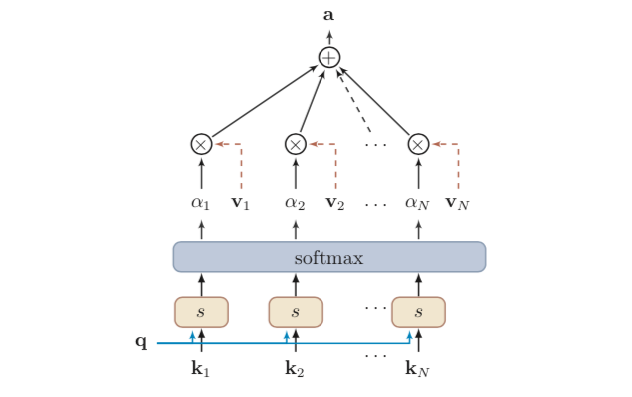

### 多头注意力机制（Multi-Head Attention Mechanism）

多个查询$Q=\left[\mathbf{q}_1,\cdots,\mathbf{q}_M\right]$平行的计算从输入信息中选取多个信息。每个注意力关注输入信息的不同部分。

$$att\left(\left(K,V\right),Q\right)=att\left(\left(K,V\right),\mathbf{q}_1\right)\oplus\cdots\oplus att\left(\left(K,V\right),\mathbf{q}_M\right)$$
其中，$\oplus$为向量拼接。

### 自注意力模型（Self-Attention Model）

输入序列$X=\left[\mathbf{x}_1,\cdots,\mathbf{x}_N\right]\in\mathbb{R}^{d_1\times N}$  
输出序列$H=\left[\mathbf{h}_1,\cdots,\mathbf{h}_N\right]\in\mathbb{R}^{d_2\times N}$

通过线性变换得到向量序列：
$$Q=W_QX\in\mathbb{R}^{d_3\times N}     \\
K=W_KX\in\mathbb{R}^{d_3\times N}       \\
V=W_VX\in\mathbb{R}^{d_2\times N}$$
其中，$Q$为查询向量序列，$K$为键向量序列，$V$为值向量序列，$W_Q,W_K,W_V$分别为可学习参数矩阵。

预测输出向量
$$\begin{align}
\hat{\mathbf{h}}_i&=att\left(\left(K,V\right),\mathbf{q}_i\right) \\
&=\sum_{j=1}^N\alpha_{ij}\mathbf{v}_j \\
&=\sum_{j=1}^Nsoftmax\left(s\left(\mathbf{k}_j,\mathbf{q}_i\right)\right)\mathbf{v}_j
\end{align}$$
其中，$i,j\in\left[1,N\right]$为输出和输入向量序列的位置，连接权重$\alpha_{ij}$由注意力机制动态生成。

若使用缩放点积模型作为打分函数，则输出向量序列
$$\begin{align}
H_{d_2\times N}&=softmax\left(\frac{K^\top Q}{\sqrt{d_3}}\right)V_{d_2\times N} \\
&=softmax\left(\frac{K^\top Q}{\sqrt{d_3}}\right)W_VX
\end{align}$$
其中，softmax为按列归一化的函数。

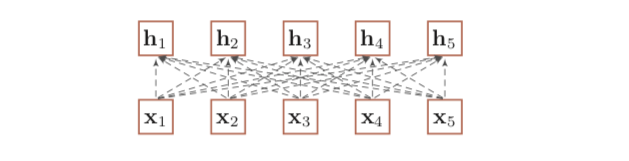

自注意力模型计算的权重$\alpha_{ij}$只依赖$\mathbf{q}_i$和$\mathbf{k}_j$的相关性，而忽略了输入信息的位置信息。因此自注意力模型一般需要加入位置编码信息来进行修正。